**DATES**

In [ ]:
data.911.timebands <- data.frame(TimeStamp = data.911[sample(c(1:nrow(data.911)), 20),c("Time Stamp")])
data.911.timebands$Date <- format(as.POSIXlt(data.911.timebands$TimeStamp), "%Y-%m-%d")
data.911.timebands$DateTimeHour <- format(as.POSIXlt(data.911.timebands$TimeStamp), "%Y-%m-%d %H")
data.911.timebands$Year <- format(as.POSIXlt(data.911.timebands$TimeStamp), "%Y")
data.911.timebands$Month <- format(as.POSIXlt(data.911.timebands$TimeStamp), "%m")

# DESCRIBING VARIABLES #
* Target Variables.  AKA Dependent Variables.  These are the values we are trying to predict.
* Predictor Variables.  These are used to predict our Target variable.  

* Non-Numeric:
    * Ordinal:  Meaningful Order vs Nominal.
    * Categorical:  Defined number of levels.  Factor.
    * Strings: Not a defined number of levels.  Character.  
    
* Numeric:
    * Continuous vs Discrete.
    
    
* Dimensionality:  Many uses of this word in data science.
    * Dimensionality of the Data: Number of variables within the data (columns).
    * Dimensionality of a Categorical Variable: Number of levels.
    
* Higher Dimension Variable:  More Dimensions.  HANDLE WITH CARE:
    * Often low exposure at some levels.
    * Some algorithms handle all combos - can overfit - and results are not intuitive.
    * More difficult to comprehend - intuition can fail us.
    
* Granularity: How precisely a variable is measured.
    * Address is most granular vs Country is least.
    
* There are instances where you want to make the data more or less granular ~ Higher or Lower Dimensionality.

**Variable Distributions**
Important to understand for a number of reasons:  

* Does distribution make sense?
* Understand distribution of target to see if your model can predict.
* Ensure samples are representative of wider population.
* Identify areas where limited exposure could lead to overfitting.

# DATA QUALITY #
* Substantial undertaking to understand and have confidence in data.
* Some initial recommended steps.
* ASOP 23: use your judgment to decide whether the data is of sufficient quality given the purpose it is to be used for and document any concerns, limitations, or other material data issues you become aware of.  

**Data Quality Assessment Techniques**
* Do common sense checks (ie variable distribution and business rule checks)
* Understand the data generation process to check for potential errors

**What determines sufficient data quality?**
* Is data sufficiently documented?
* Are the variables accurate?
* Understand extent to which data provider ensures accuracy.
* Are quantities measured in consistent units?
* Is the data well populated?
* Is the data representative of the modeled population?




    

# DATA DESIGN #
* Process of going from existing dataset to the data you will use in your modeling project.
* Several Components.

* Time Frame: Choose appropriate time frame in order to most closely reflect future expectations.  Capture:
    * Black Swan Events
    * Changing cultural/social behaviors
    * Other developments that significantly affect the outcome you are modeling
    
**Sampling**
* Random Sampling: Drow random records without replacement with each record equally likely to be selected
* Stratified Sampling: Independently draw set number from each strata (group) in your data.  Random sampling in groups.
    * Oversampling: More samples from minority group
    * Undersampling: Fewer samples from majority group
* Systematic Sampling: Pattern such as every nth record - or time frame.


**Why do we sample?**
* Appropriate time frame ; size ; model testing ; irrelevant/misleading data ; imbalanced data.  

* Size: Might not be feasible to model entire dataset.
* Model Testing: Does model *generalize* well.
* Irrelevant/misleading data: For example - remove observations under age X.
* Imbalanced data: oversample/undersample.



# DATA BLENDING AND MATCHING #
* Data Matching: Process of taking records from one dataset and combine with another.

# DATA VISUALIZATION #
* Generally speaking - 3 main aspects of visualization: 
    * Data Mining
    * Graphic Design
    * Storytelling
    
* Should be used in all stages of data analytics.

* Scatterplot: Good for comparing 2 continuous variables.
* Histogram:  Not a bar chart.  Histogram shows a density function.  Need to choose binning correctly.
* 2D Histogram: Presents frequency with a color scale.  

* Frequency and Density Plots: Frequency plots are similar to histograms - but they draw a curve connecting the counts in the histogram.  Shows peaks and shape in more detail.  Density plots plot an estimate using a density function based on observed data.  

**BOX PLOT**
    * Box:  25th, 50th (median), and 75th percentiles (this is the Inter-Quartile Range (IQR)).
    * Whiskers: Highest value that is still within 75th + 1.5 * IQR ; Lowest value still within 25th - 1.5* IQR.
    * Outliers: Beyond the whiskers.
    
**ggpairs**
* Grouped histograms for comparing 2 categoricals.
* Scatterplots for comparing 2 numericals.
* Box Plots for categorical v numerical comparisons.
* Correlation of 2 numericals.





# DATA TRANSFORMATION #
* Data transformation needs heavily dependent on model type selected.
* Reasons include:
    * Better visualize.
    * Meet requirements of certain algorithms.
    * Help improve model performance.
    
**Normalization**
* The process of transforming the data to the range [0,1] 
* $X'= \frac{X-MIN(X)}{MAX(X)-MIN(X)}$
* Useful when distance is used - like with K-Means Clustering.

**Log Transformations**
* Brings a skewed distribution back into symmetry.
* Generally a good idea when values range over several orders of magnitude.
* Modeling techniques often have difficulty with wide ranges like this.
* Logs are naturally multiplicative:
    * log scales inform on relative changes (multiplicative) ; linear scale informs on absolute change (additive)

**Standardization**
* $X'= \frac{X-MEAN(X)}{STD(X)}$
* Many algorithms assume all variables centered at zero with unit variance.  Variables with larger variance will dominate signal.  Examples: SVM ; Penalized Regression.

**Power Transformations**
* Square/Cube (1/2 ; 1/3): Roots: Similar to log-transforms. Useful for reducing right-skew.
* Reciprocal (-1): Useful to alter shape of distribution and ease interpretation of ratios.
* Square/Cube( 2 ; 3): Useful for reducing left-skew.

**Scaling to Unit Length**
* This is used when a scalar matrix is used in the distance measurement.
* $X' = \frac{X}{||X||}$ where ||X|| is the Euclidean length of the vector.

**Logit**
* Log odds ratio.
* $X' = log(\frac{X}{1-X})$
* Used to transform probabilities, percentages, and proportions.

# BINARIZE WITH CARET #
* DummyVars

# SKEWED DATA #
* Right Skew:  Has very large values but not correspondingly small values.  Median < Mean ; ~ Mode < Median
* Left Skew: Has very small values but not correspondingly large values.  Mean > Median ; ~ Mode > Median

In [1]:
library(caret)
binarizer <- dummyVars(formula = '~ continent', data.all, sep = '_')


continent.binarized <- predict(binarizer, data.all)

data.binarized <- cbind(data.all, continent.binarized)
data.binarized[data.binarized$year == 2007, 
               c("country",
                 "continent",
                 "continent_Africa", 
                 "continent_Americas", 
                 "continent_Asia",
                 "continent_Europe",
                 "continent_Oceania")][1:10,]


data.binarized[c("continent_Africa", 
                 "continent_Americas", 
                 "continent_Asia",
                 "continent_Europe",
                 "continent_Oceania")] <- (data.binarized[c("continent_Africa", 
                                                            "continent_Americas", 
                                                            "continent_Asia",
                                                            "continent_Europe",
                                                            "continent_Oceania")] == 1)

data.binarized[data.binarized$year == 2007, 
               c("country",
                 "continent",
                 "continent_Africa", 
                 "continent_Americas", 
                 "continent_Asia",
                 "continent_Europe",
                 "continent_Oceania")][1:10,]



Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


ERROR: Error in is.data.frame(data): object 'data.all' not found


In [ ]:
# MERGING DATA #
* Merging by multiple columns
* by.x ; by.y ; all.x = TRUE/FALSE ; all.y = TRUE/FALSE
* all = TRUE : OUTER JOIN
* all.x = TRUE : LEFT OUTER
* all.y = TRUE : RIGHT OUTER
* by = NULL : CROSS JOIN (no all.x or all.y)

In [ ]:
merged.data <- merge(x = merged.data, 
    y = demographic.data, by.x = c("Zip", "Sex"), by.y = c("ZipCode", "Sex"), all.x = TRUE, all.y = FALSE)

# REGEX #

In [2]:
address.data <- data.frame(Address = c("1 Fireman St. 49884","Apt 5, 6 New Ave, 99344", "21 Grey Road 50046 USA"))
address.data


zipRegex <- "[0-9]{5}"

## Search through a string using the regular expression
library(stringr)
testString <- "1 Fireman St. 49884"
str_extract(testString, zipRegex)


Address
1 Fireman St. 49884
"Apt 5, 6 New Ave, 99344"
21 Grey Road 50046 USA


[1] "49884"

# 2D HISTOGRAM #

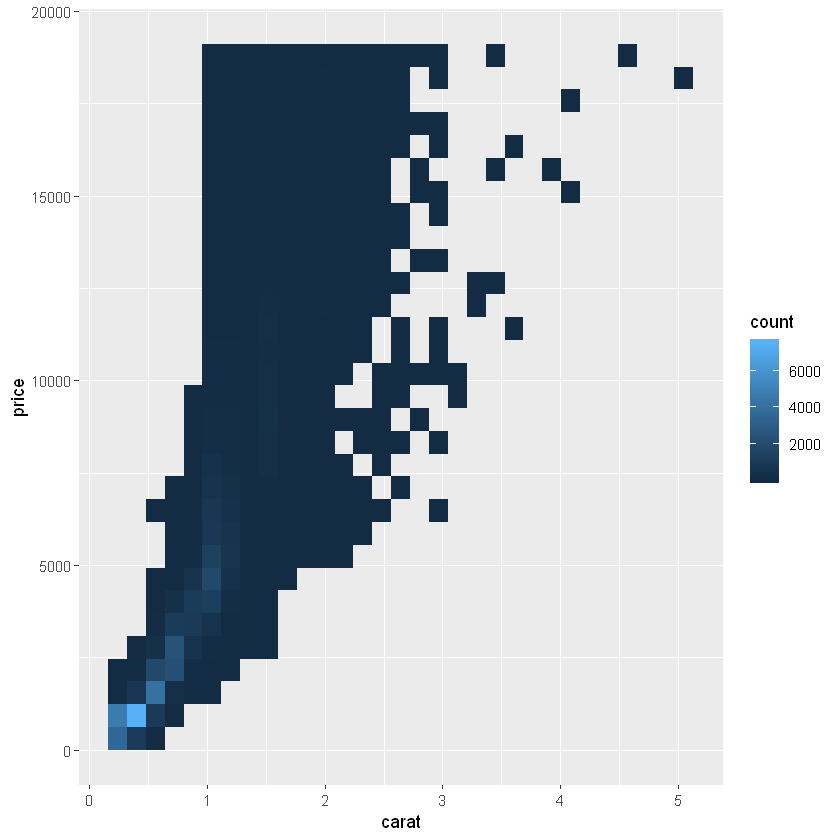

In [3]:
ggplot(data = diamonds, aes(x=carat, y=price)) + geom_bin2d()


# GGPAIRS #

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


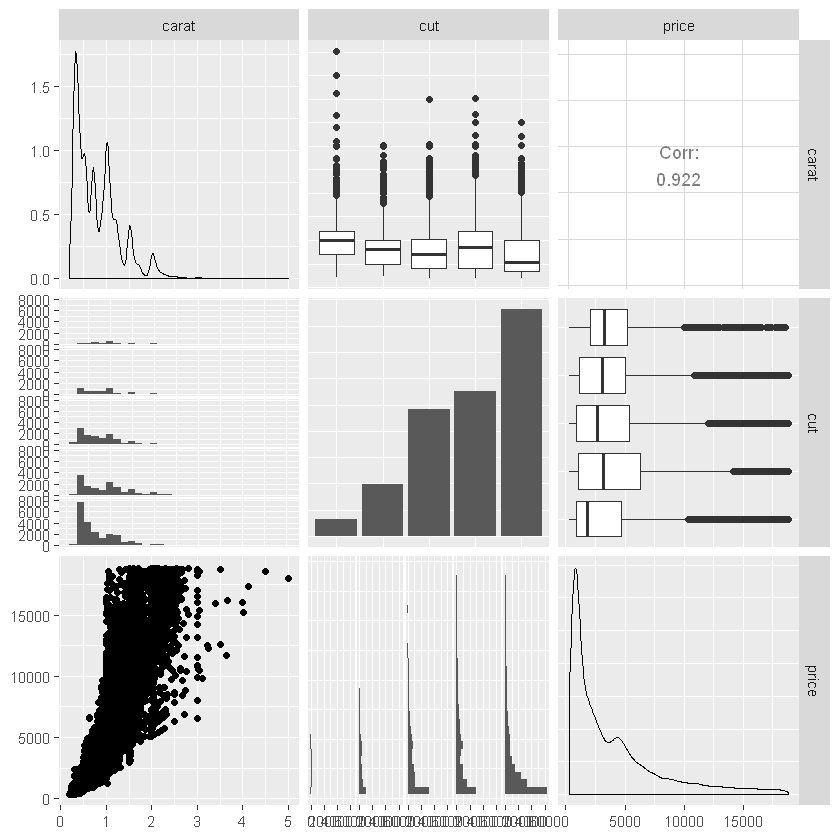

In [4]:
library(GGally)
ggpairs(diamonds, c(1:2, 7))

# DATA TRANSFORMATIONS #
* Untransformed ; log transformed ; square root transformed

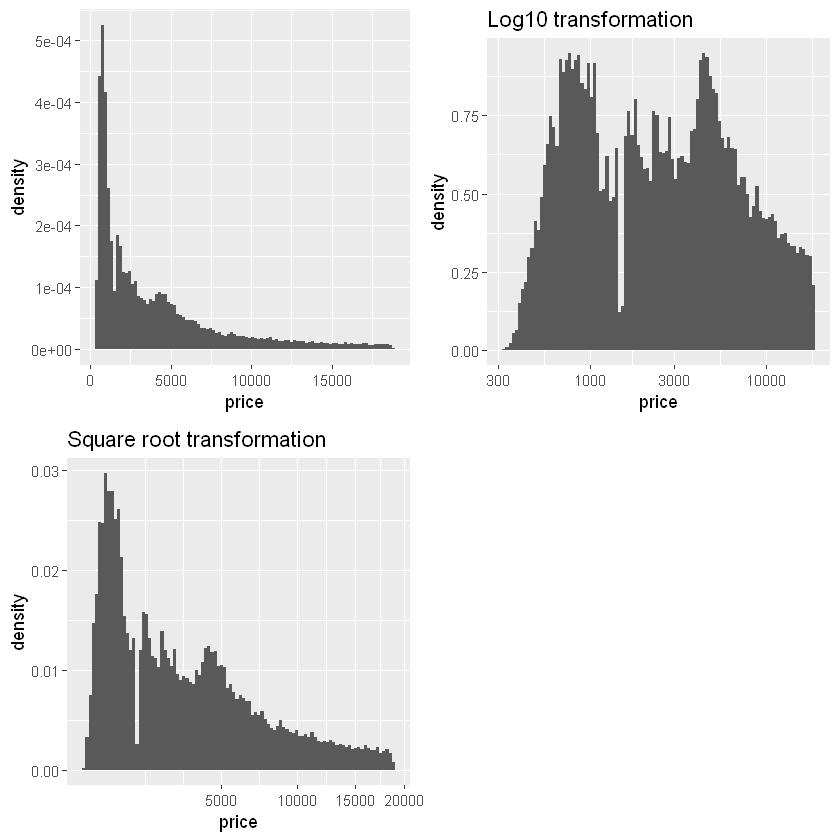

In [5]:
#CHUNK 1
library(ggplot2)
library(gridExtra)
p1 <- ggplot(data = diamonds, aes(price, ..density..)) +
        geom_histogram(bins = 100)
p2 <- p1 + scale_x_log10() + ggtitle("Log10 transformation")
p3 <- p1 + scale_x_sqrt() + ggtitle("Square root transformation")
grid.arrange(p1, p2, p3, ncol = 2)

# STANDARDIZATION #
* Look at the effect of standardization on simulated data

[1] "Original mean:  50.3397503631562 ; sd:  28.8297069196058"
[1] "Standardized mean:  2.02197335480783e-17 ; sd:  1"


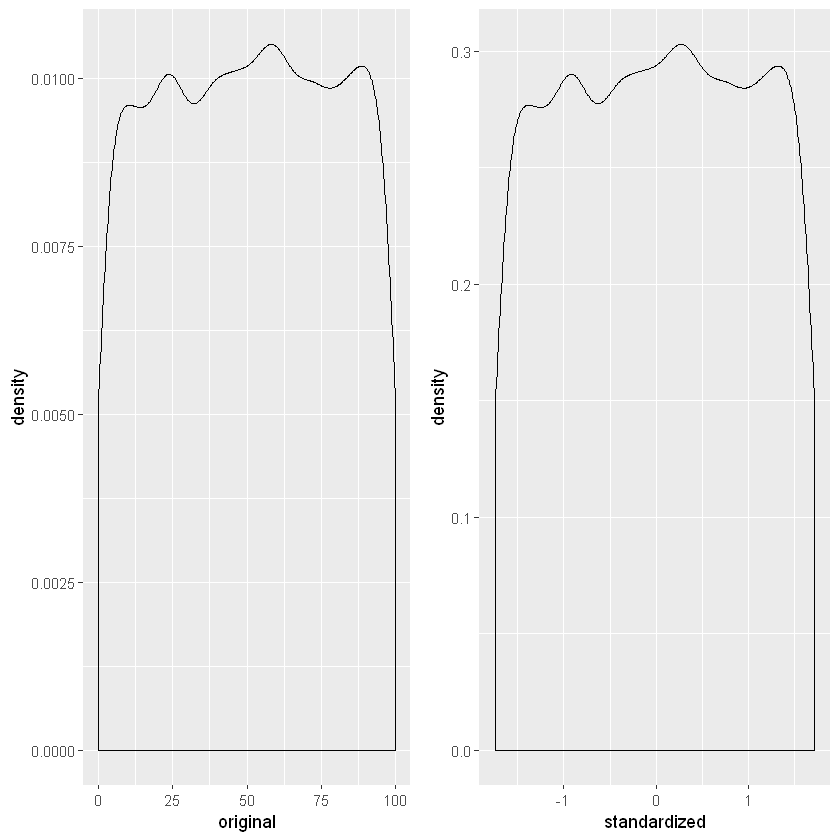

In [6]:
#The original data is 10,000 simlulations of a uniform(0,100) variable
original <- runif(10000, min = 0, max = 100)
#Use the scale function to standardize and make data frames.
standardized <- as.data.frame(scale(original))
original <- as.data.frame(original)
#Name the variables
names(original) <- "original"
names(standardized) <- "standardized"
#Graph the data
print(paste("Original mean: ", mean(original$original), "; sd: ", sd(original$original)))
print(paste("Standardized mean: ", mean(standardized$standardized), "; sd: ", sd(standardized$standardized)))

p1 <- ggplot(data = original, aes(x = original)) + geom_density()
p2 <- ggplot(data = standardized, aes(x = standardized)) + geom_density()
grid.arrange(p1, p2, ncol = 2)
